# Define Functions

### Libraries

In [1]:
import sqlalchemy as sql
import pandas as pd
from fbprophet import Prophet

## Information from Database

In [2]:
#Database Connection String
database_connection_string = 'sqlite:///Resources/tourism_data.db'
#Create Engine
engine = sql.create_engine(database_connection_string)

In [3]:
sql_query = """
SELECT ds,y FROM tourism_data
WHERE Country = 'Jamaica'
"""

In [4]:
df = pd.read_sql_query(sql_query,engine)
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      195 non-null    datetime64[ns]
 1   y       195 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 KB


In [ ]:
#outliers
df_nopandemic = df.copy()
df_nopandemic.loc[(df_nopandemic['ds'] > '2020-01-01') & (df_nopandemic['ds'] < '2021-08-01'),'y'] = None

In [6]:
#regressor
df['regressor'] = 0
df.loc[(df['ds'] > '2020-01-01') & (df['ds'] < '2021-08-01'),'regressor'] = 1
#df.tail(50)

In [7]:
model = Prophet()

In [8]:
#With Regressor
model.add_regressor('regressor')
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#with Outliers
model.fit(df_nopandemic)
df_future = model.make_future_dataframe(periods=24, freq='M')

In [9]:
#with Regressor
df_future = model.make_future_dataframe(periods=24, freq='M')
df_future['regressor'] = 0
df_future.loc[(df_future['ds'] > '2020-01-01') & (df_future['ds'] < '2021-08-01'),'regressor'] = 1

In [10]:
forecast_data = model.predict(df_future)

In [11]:
forecast_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,regressor,regressor_lower,regressor_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
214,2023-10-31,208668.894753,150395.881183,206678.645382,208307.811614,209022.184959,-30285.934871,-30285.934871,-30285.934871,0.0,...,0.0,0.0,0.0,-30285.934871,-30285.934871,-30285.934871,0.0,0.0,0.0,178382.959882
215,2023-11-30,208776.542888,213486.359506,269248.735696,208383.266191,209159.154937,32372.210484,32372.210484,32372.210484,0.0,...,0.0,0.0,0.0,32372.210484,32372.210484,32372.210484,0.0,0.0,0.0,241148.753372
216,2023-12-31,208887.779294,171157.666403,225218.857732,208474.467792,209305.313249,-8853.034470,-8853.034470,-8853.034470,0.0,...,0.0,0.0,0.0,-8853.034470,-8853.034470,-8853.034470,0.0,0.0,0.0,200034.744823
217,2024-01-31,208999.015700,224430.368240,279099.295972,208550.265147,209443.238896,44344.554486,44344.554486,44344.554486,0.0,...,0.0,0.0,0.0,44344.554486,44344.554486,44344.554486,0.0,0.0,0.0,253343.570186
218,2024-02-29,209103.075563,192275.758110,251862.317899,208624.500586,209574.786097,12402.777571,12402.777571,12402.777571,0.0,...,0.0,0.0,0.0,12402.777571,12402.777571,12402.777571,0.0,0.0,0.0,221505.853135


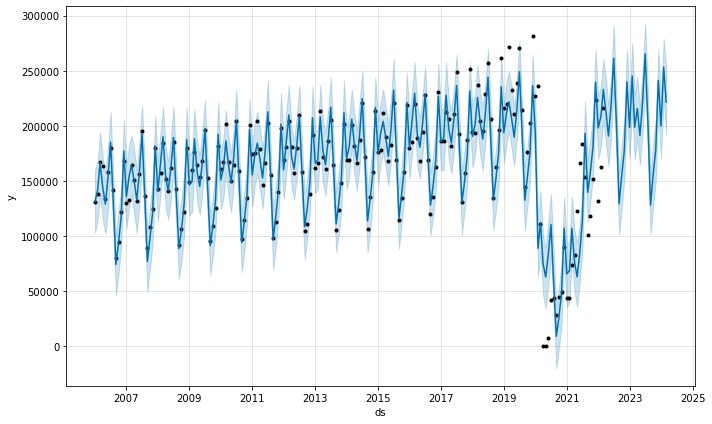

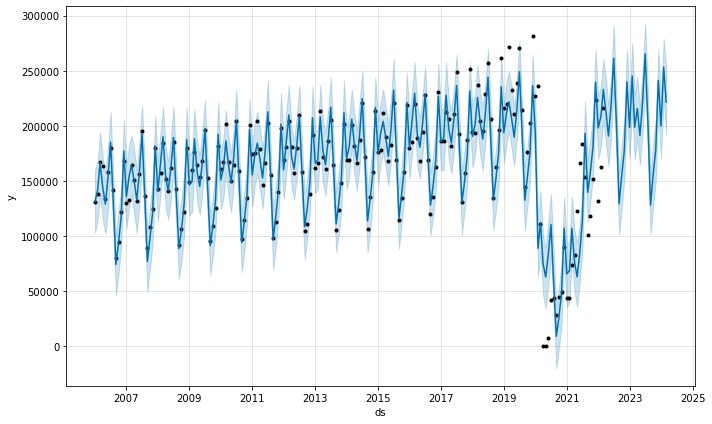

In [12]:
model.plot(forecast_data)

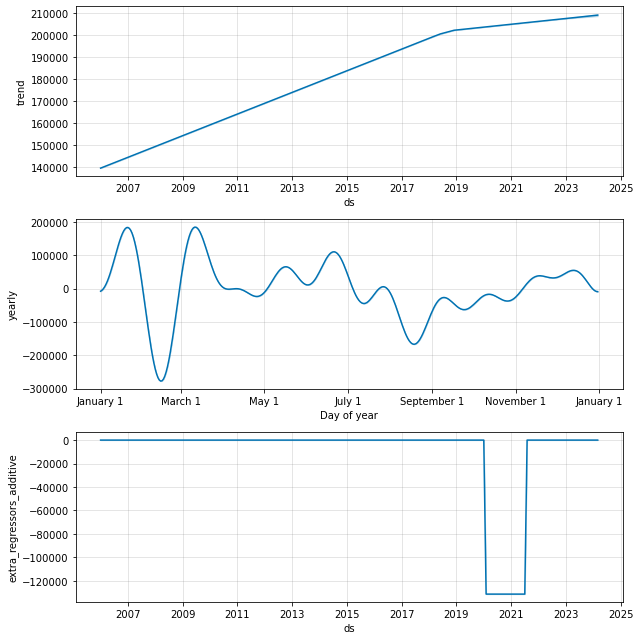

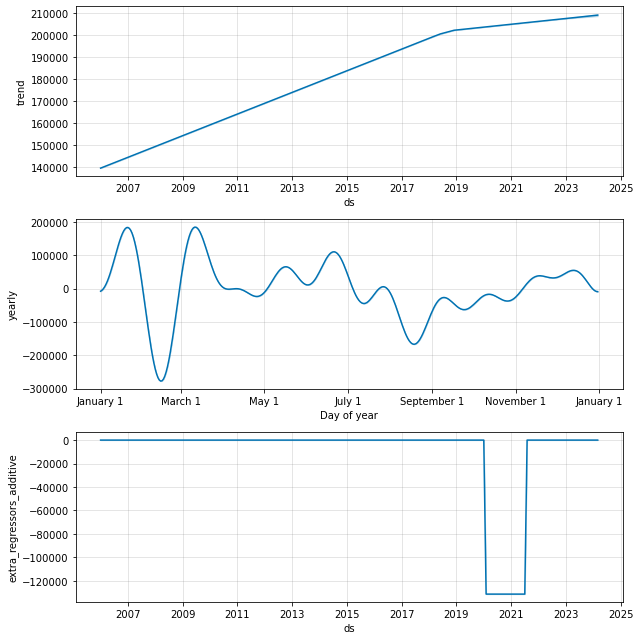

In [13]:
model.plot_components(forecast_data)